<a href="https://colab.research.google.com/github/kodikarthik21/CS6910---Fundamentals-of-Deep-Learning/blob/main/Assignment02/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip '/content/drive/MyDrive/nature_12K'

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [ ]:
!cp -r '/content/inaturalist_12K' '/content/drive/MyDrive/inaturalist'

#Question 1 (5 Marks)



Build a small CNN model consisting of  5 convolution layers. Each convolution layer would be followed by a ReLU activation and a max pooling layer. Here is sample code for building one such conv-relu-maxpool block in keras. 

After 5 such conv-relu-maxpool blocks of  layers you should have one dense layer followed by the output layer containing 10 neurons (1 for each of the 10 classes). The input layer should be compatible with the images in the iNaturalist dataset.






In [2]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/inaturalist/train', 
                                                                    validation_split=0.1, seed = 123, subset = "training")

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/inaturalist/train', 
                                                                    validation_split=0.1, seed = 123, subset = "validation")

Found 9999 files belonging to 10 classes.
Using 9000 files for training.
Found 9999 files belonging to 10 classes.
Using 999 files for validation.


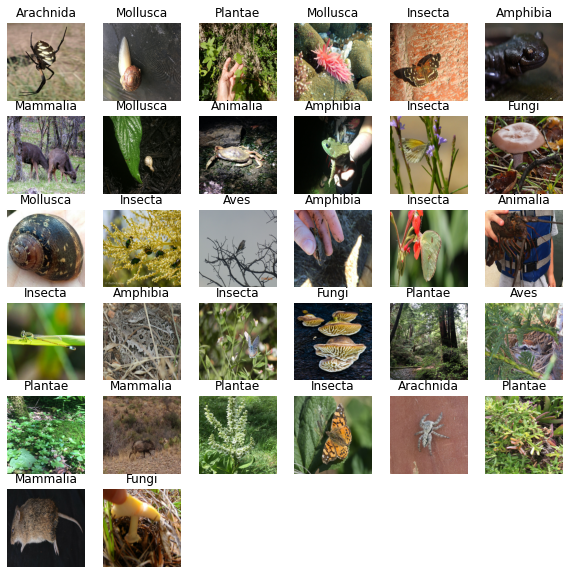

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

for i in range(1,5):
  model.add(Conv2D(16, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, batch_size = 32, epochs = 3)

model.save('iNaturalist_CNN')

model.summary()

In [ ]:
tf.test.gpu_device_name()